# Importing and Exporting Data

## Importing Data from Cryptowatch

In [13]:
import requests
import pandas as pd

def get_historic_price(symbol, exchange='bitfinex', after = '2022-01-01'):
    url = f"https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc"
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns = [
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

last_month = (pd.Timestamp.now() - pd.offsets.Day(30))

eth = get_historic_price('eth','bitstamp', after = last_month)
btc = get_historic_price('btc','bitstamp', after = last_month)

### Etherium Price in USD

#### **Etherium Close Time**

<AxesSubplot:xlabel='CloseTime'>

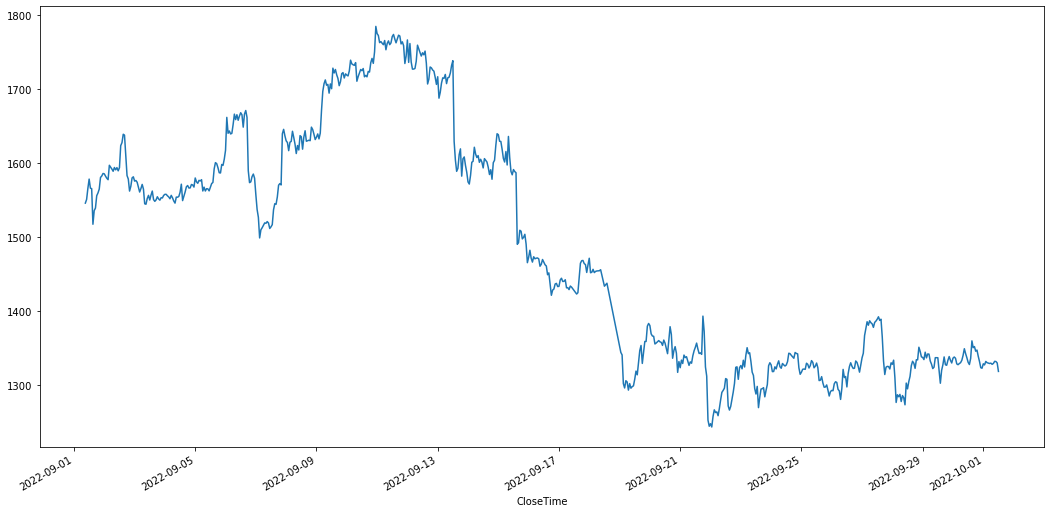

In [ ]:
eth['ClosePrice'].plot(figsize=(18,9))

#### **Etherium Statistics**

In [ ]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,705.000000,705.000000,705.000000,705.000000,705.000000,7.050000e+02
mean,1486.795177,1495.145674,1477.390780,1486.574610,852.470393,1.245820e+06
std,157.063935,157.691158,156.280018,157.061632,960.146140,1.383638e+06
min,1243.200000,1251.800000,1218.800000,1243.100000,0.334149,4.429013e+02
25%,1330.900000,1338.200000,1325.300000,1331.200000,276.183600,4.099747e+05
50%,1476.100000,1480.300000,1466.500000,1471.800000,577.646884,8.287352e+05
75%,1608.600000,1619.400000,1593.300000,1606.400000,1064.306728,1.553023e+06
max,1785.600000,1789.400000,1774.600000,1785.100000,10000.891995,1.343418e+07


### Bitcoin Price in USD

#### **Bitcoin Close Price**

<AxesSubplot:xlabel='CloseTime'>

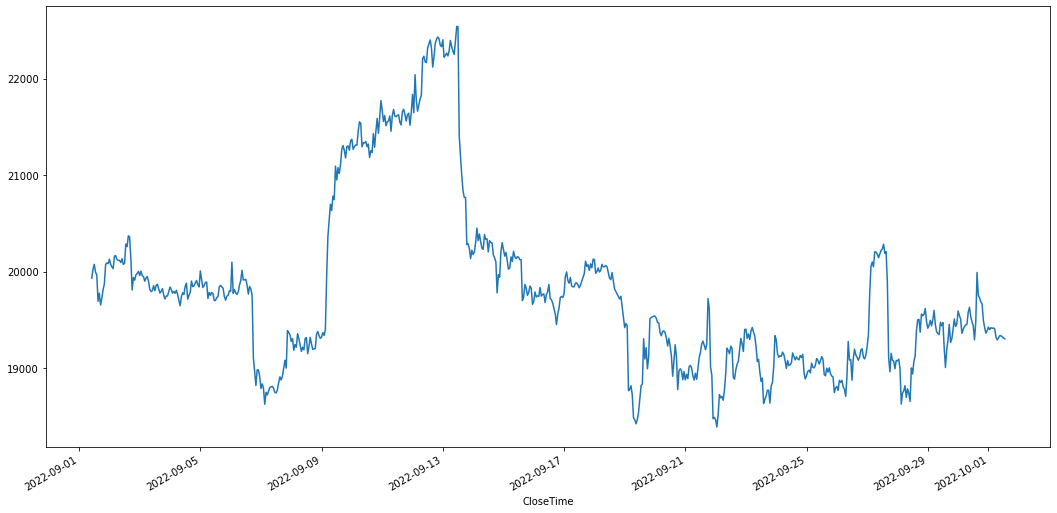

In [14]:
btc['ClosePrice'].plot(figsize=(18,9))

#### **Bitcoin Statistics**

In [16]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,716.000000,716.000000,716.000000,716.000000,716.000000,7.160000e+02
mean,19807.356145,19891.826816,19720.016760,19807.220670,93.536732,1.846468e+06
std,908.399872,916.376109,906.687406,908.664976,116.466949,2.282052e+06
min,18390.000000,18472.000000,18157.000000,18390.000000,0.101355,2.031984e+03
25%,19140.000000,19231.750000,19060.250000,19137.000000,29.782916,5.920944e+05
50%,19703.000000,19778.000000,19622.000000,19706.000000,59.214487,1.183508e+06
75%,20086.750000,20147.250000,19998.000000,20083.000000,117.003685,2.350329e+06
max,22545.000000,22781.000000,22485.000000,22540.000000,1672.053421,3.206297e+07


## Exporting Data from Cryptowatch

### Exporting to Excel

In [23]:
writer = pd.ExcelWriter('cryptos.xlsx')

btc.to_excel(writer, sheet_name = 'Bitcoin')
eth.to_excel(writer, sheet_name = 'Ether')

writer.save()

/tmp/ipykernel_15212/3938596352.py:6: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
